# Season cards at Bern's major sport klubs

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

## Importing and cleaning the data.

### Data for YB (Football)

In [8]:
# Import the data for YB (football). 
df_yb = pd.read_csv('data/original_yb.csv')
df_yb.head()

,PLZ,YB
0,1066,2
1,1110,1
2,1242,34
3,1260,1
4,1510,1


### Data for SCB

In [9]:
# Import the data for SCB (ice hockey)
df_scb = pd.read_csv('data/original_scb.csv')
df_scb = df_scb[['PLZ','SCB']] # Getting rid of the columns 'Gemeinde' and 'Land' to avoid problems while merging (multiple values for Gemeinde with the same PLZ)
df_scb.head()

,PLZ,SCB
0,1003,1
1,1004,1
2,1005,2
3,1023,1
4,1024,1


In [10]:
df_scb[df_scb['PLZ'] == 3053]

,PLZ,SCB
259,3053,135
260,3053,14
261,3053,1
262,3053,1
263,3053,4
264,3053,2


In [11]:
# The dataset contains some ZIP codes with more than four digits. These are foreign ZIP codes.
df_scb[df_scb['PLZ'] > 9999]

,PLZ,SCB
1150,10405,1
1151,63599,1
1152,72514,1
1153,74100,1
1154,79774,1


In [12]:
# Let's save them to an own dataframe... 
df_scb_foreign = df_scb[df_scb['PLZ'] > 9999]

# ... and take them out of the original one. 
df_scb = df_scb[df_scb['PLZ'] < 9999]
df_scb[df_scb['PLZ'] > 9999]

,PLZ,SCB


In [13]:
# The data contains multiple entries for certain ZIP codes. For example for Münchenbuchsee. 
df_scb[df_scb['PLZ'] == 3053]

,PLZ,SCB
259,3053,135
260,3053,14
261,3053,1
262,3053,1
263,3053,4
264,3053,2


In [14]:
# Let's take the duplicates out. 
df_scb = df_scb.groupby('PLZ')['SCB'].sum()
df_scb = pd.DataFrame(df_scb)
df_scb = df_scb.reset_index()
df_scb[df_scb['PLZ'] == 3053]

,PLZ,SCB
226,3053,157


## Data about the ZIP code areas 

Quelle der Daten: Bundesamt für Statistik, statistisches Jahrbuch. Stand: 2014. ([Link zum Excel-Dokument](http://www.bfs.admin.ch/bfs/portal/de/index/themen/01/02/blank/key/raeumliche_verteilung/agglomerationen.Document.154450.xls))

Die Darstellung wird in der Tabellenverarbeitung vereinfacht. Mit Regex in "Atom" werden die Trennzeichen bei Tausenderwerten gelöscht: ```(\d+) (\d{3})``` suchen und durch ```$1$2``` ersetzen. 

In [15]:
# Import the data for the ZIP codes. 
df_plz = pd.read_csv('data/plz.csv')
df_plz.head(5)

,PLZ,Total,Schweiz,Ausland,Mann,Frau,0-4,5-9,10-14,15-19,...,80-84,85-89,90 und mehr,Ledig,Verheiratet,Verwitwet,Geschieden,Unverheiratet,In eingetrage-ner Partner-schaft,Aufgelöste Partnerschaft
0,1000,2964,1799,1165,1479,1485,126,199,175,326,...,31,21,13,1614,1114,85,148,1,2,0
1,1003,8269,4546,3723,4143,4126,422,297,218,311,...,146,135,93,4743,2353,343,775,0,53,2
2,1004,28996,16624,12372,13983,15013,1435,1154,1110,1266,...,752,560,293,14913,9852,1352,2782,3,85,8
3,1005,11645,6765,4880,5578,6067,536,472,429,509,...,289,214,134,6462,3596,502,1031,2,41,7
4,1006,14638,8859,5779,6976,7662,745,647,476,592,...,402,289,191,7706,4794,680,1423,0,29,6


In [16]:
# Merge the three data sets. 
df_temp = df_plz.merge(df_scb, on='PLZ', how='left')
df = df_temp.merge(df_yb, on='PLZ', how='left')
df.head()

,PLZ,Total,Schweiz,Ausland,Mann,Frau,0-4,5-9,10-14,15-19,...,90 und mehr,Ledig,Verheiratet,Verwitwet,Geschieden,Unverheiratet,In eingetrage-ner Partner-schaft,Aufgelöste Partnerschaft,SCB,YB
0,1000,2964,1799,1165,1479,1485,126,199,175,326,...,13,1614,1114,85,148,1,2,0,NaN,NaN
1,1003,8269,4546,3723,4143,4126,422,297,218,311,...,93,4743,2353,343,775,0,53,2,1.0,NaN
2,1004,28996,16624,12372,13983,15013,1435,1154,1110,1266,...,293,14913,9852,1352,2782,3,85,8,1.0,NaN
3,1005,11645,6765,4880,5578,6067,536,472,429,509,...,134,6462,3596,502,1031,2,41,7,2.0,NaN
4,1006,14638,8859,5779,6976,7662,745,647,476,592,...,191,7706,4794,680,1423,0,29,6,NaN,NaN


## Analyzing the data

In [17]:
# How many cards did YB sell? 
df['YB'].sum()

9815.0

In [18]:
# How many cards did SCB sell?
df['SCB'].sum()

9177.0

In [19]:
# How many entries are available for YB? 
df['YB'].count()

594

In [20]:
# How many entries are available for SCB?
df['SCB'].count()

941

In [21]:
# What ZIP code has the highest number of YB cards?
df[['PLZ','YB']].sort_values(by='YB', ascending=False).head(20)

,PLZ,YB
861,3014,829.0
855,3007,394.0
860,3013,358.0
854,3006,323.0
890,3072,249.0
859,3012,233.0
851,3000,208.0
863,3018,188.0
882,3052,186.0
883,3053,185.0


In [22]:
# What ZIP code have the highest numbers of SCB cards?
df[['PLZ','SCB']].sort_values(by='SCB', ascending=False).head(20)

,PLZ,SCB
890,3072,249.0
917,3123,211.0
861,3014,191.0
863,3018,165.0
883,3053,157.0
854,3006,155.0
882,3052,146.0
885,3063,136.0
907,3098,132.0
855,3007,127.0


In [23]:
# What ZIP code has the highest number of YB cards per capita?
df['YB_relativ'] = df['YB'] / df['Total']
df[['PLZ', 'YB_relativ']].sort_values(by='YB_relativ', ascending=False).head(20)

,PLZ,YB_relativ
851,3000,0.319508
861,3014,0.060773
858,3011,0.034856
860,3013,0.034849
950,3202,0.031250
1012,3313,0.027897
1008,3307,0.026455
855,3007,0.025775
980,3262,0.024806
1009,3308,0.023810


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


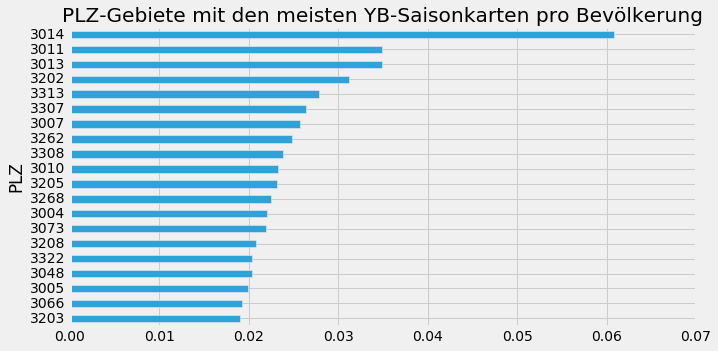

In [24]:
# Let's take out the ZIP code 3000 since these are probably mainly postboxes and companies. 
df[df['PLZ'] != 3000][['PLZ', 'YB_relativ']].sort_values(by='YB_relativ', ascending=False).head(20).sort('YB_relativ', ascending=True).plot(kind='barh', x='PLZ', y='YB_relativ', title='PLZ-Gebiete mit den meisten YB-Saisonkarten pro Bevölkerung', legend=False, figsize = [10,5])
plt.savefig('output/YB_PLZ.svg')

In [36]:
# Data for 3014:
df[df['PLZ'] == 3014][['PLZ', 'Total', 'SCB', 'SCB_relativ', 'YB', 'YB_relativ']]

,PLZ,Total,SCB,SCB_relativ,YB,YB_relativ
861,3014,13641,191.0,0.014002,829.0,0.060773


In [25]:
# What ZIP code has the highest number of SCB cards per capita?
df['SCB_relativ'] = df['SCB'] / df['Total']
df[['PLZ', 'SCB_relativ']].sort_values(by='SCB_relativ', ascending=False).head(20)

,PLZ,SCB_relativ
1008,3307,0.052910
956,3208,0.037500
769,2723,0.033333
944,3179,0.030093
881,3049,0.027451
869,3034,0.026820
977,3255,0.023381
857,3010,0.023256
884,3054,0.023199
876,3044,0.023112


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


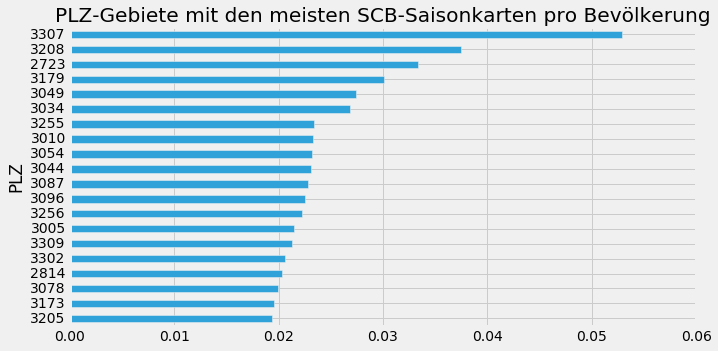

In [26]:
# Let's plot it 
df[['PLZ', 'SCB_relativ']].sort_values(by='SCB_relativ', ascending=False).head(20).sort('SCB_relativ', ascending=True).plot(kind='barh', x='PLZ', y='SCB_relativ', title='PLZ-Gebiete mit den meisten SCB-Saisonkarten pro Bevölkerung', legend=False, figsize = [10,5])
plt.savefig('output/SCB_PLZ.svg')

In [35]:
# Data for 3307 (Brunnenthal, SO):
df[df['PLZ'] == 3307][['PLZ', 'Total', 'SCB', 'SCB_relativ', 'YB', 'YB_relativ']]

,PLZ,Total,SCB,SCB_relativ,YB,YB_relativ
1008,3307,189,10.0,0.05291,5.0,0.026455


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


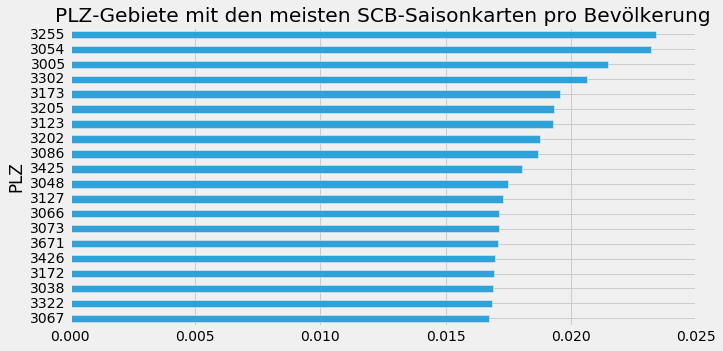

In [39]:
# In the previous example, there are some communities with little inhabitants. Let's take them out.
# This are the PLZ with at leas 1000 inhabitants. 
df[df['Total'] > 1000][['PLZ', 'SCB_relativ']].sort_values(by='SCB_relativ', ascending=False).head(20).sort('SCB_relativ', ascending=True).plot(kind='barh', x='PLZ', y='SCB_relativ', title='PLZ-Gebiete mit den meisten SCB-Saisonkarten pro Bevölkerung', legend=False, figsize = [10,5])
plt.savefig('output/SCB_PLZ_grosse.svg')

In [40]:
# Some information about 3255 (Rapperswil BE):
df[df['PLZ'] == 3255][['PLZ', 'Total', 'SCB', 'SCB_relativ', 'YB', 'YB_relativ']]

,PLZ,Total,SCB,SCB_relativ,YB,YB_relativ
977,3255,1112,26.0,0.023381,12.0,0.010791


In [28]:
# In what ZIP code they sold the same amount of SCB as YB cards?
df.loc[(df["YB"] == df["SCB"])].sort_values(by='SCB', ascending=False)[['PLZ', 'YB', 'SCB']].head(5)

,PLZ,YB,SCB
890,3072,249.0,249.0
912,3113,39.0,39.0
939,3174,30.0,30.0
952,3204,17.0,17.0
1053,3432,12.0,12.0


## Export the necessary data for the map.
We will use [Carto](http://carto.com) to put the data on a map. Since Carto doesn't have the Shapefiles for the Swiss ZIP areas integrated, we need to download them from [Cadastre.ch](http://www.cadastre.ch/internet/kataster/de/home/services/service/plz.html) and simplify it with [Ogr2ogr](http://www.gdal.org/ogr2ogr.html). 

In [310]:
# Generate the CSV file for the import to 'Carto'.
df[['PLZ','YB','YB_relativ','SCB','SCB_relativ']].to_csv('output/fanmap_final.csv')